<a href="https://colab.research.google.com/github/pranay8297/deep-learning-projects/blob/master/cats_nd_dogs_breeds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai.vision import *
from fastai.metrics import error_rate, accuracy

In [3]:
path = untar_data(URLs.PETS)
path.ls()

[PosixPath('/root/.fastai/data/oxford-iiit-pet/images'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/annotations')]

In [0]:
path_img = path/'images'
path_lbl = path/'annotations'

In [7]:
path_lbl.ls()

[PosixPath('/root/.fastai/data/oxford-iiit-pet/annotations/trimaps'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/annotations/README'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/annotations/trainval.txt'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/annotations/._trimaps'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/annotations/test.txt'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/annotations/xmls'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/annotations/list.txt')]

In [8]:
path_img.ls()[:3]

[PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Birman_8.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/american_pit_bull_terrier_42.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Egyptian_Mau_85.jpg')]

In [0]:
fnames = get_image_files(path_img)

In [10]:
fnames[:3]

[PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Birman_8.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/american_pit_bull_terrier_42.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Egyptian_Mau_85.jpg')]

In [0]:
np.random.seed(2)
pat = r'/([^/]+)_\d+.jpg$'

In [0]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms = get_transforms(), size = 224, bs = 64).normalize(imagenet_stats)

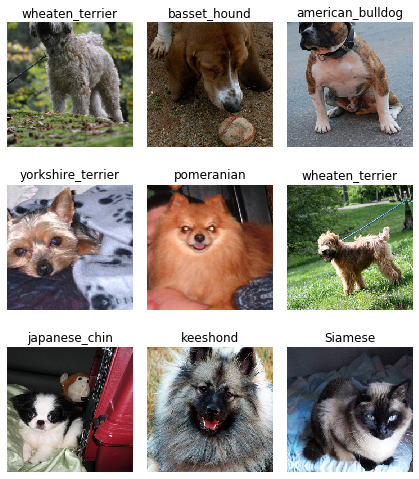

In [15]:
data.show_batch(rows = 3, figsize = (6, 7))

In [19]:
learn = cnn_learner(data, models.resnet34, metrics = error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [21]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [22]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.373169,0.351261,0.115697,01:26
1,0.599350,0.307822,0.096076,01:27
2,0.366065,0.242934,0.079161,01:27
3,0.281229,0.240009,0.075101,01:27


In [0]:
learn.save('stage_1')

In [0]:
learn.unfreeze()

In [25]:
learn.fit_one_cycle(2)

epoch,train_loss,valid_loss,error_rate,time
0,0.767537,0.847652,0.241543,01:30
1,0.449263,0.294271,0.089310,01:29


In [26]:
learn.load('stage_1')
learn.lr_find()

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


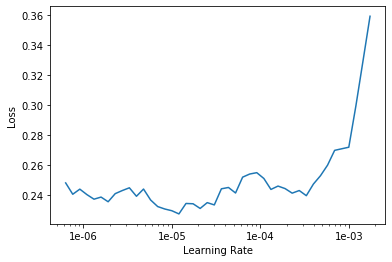

In [27]:
learn.recorder.plot()

In [28]:
learn.unfreeze()
learn.fit_one_cycle(4, max_lr= slice(1e-6, 1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.244096,0.231779,0.069689,01:30
1,0.227885,0.230416,0.071719,01:29
2,0.216985,0.224071,0.068336,01:29
3,0.182648,0.221090,0.065629,01:28


In [0]:
learn.save('stage_2')

In [31]:
learn = cnn_learner(data, models.resnet50, metrics = error_rate)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth


In [32]:
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,error_rate,time
0,0.843409,0.307912,0.099459,01:32
1,0.433262,0.247278,0.077808,01:33
2,0.260058,0.204083,0.063599,01:33


epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


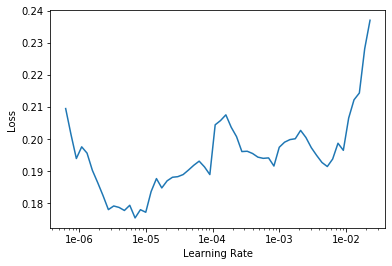

In [33]:
learn.save('stage_3')
learn.lr_find()
learn.recorder.plot()

In [35]:
learn.fit_one_cycle(3, max_lr = slice(1e-6, 1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.187878,0.206262,0.065629,01:33
1,0.189003,0.200997,0.062923,01:32
2,0.173663,0.203741,0.065629,01:35


In [36]:
learn.save('stage_3_1')
learn.load('stage_3')
learn.unfreeze()
learn.fit_one_cycle(4, max_lr= slice(7e-5, 9e-3))

epoch,train_loss,valid_loss,error_rate,time
0,1.030216,2.386151,0.476319,01:37
1,1.171361,0.921713,0.231394,01:38
2,0.650670,0.369459,0.109608,01:39
3,0.311978,0.257839,0.081191,01:37


In [0]:
learn.save('stage_3_2')
learn.load('stage_3')
learn.lr_find()

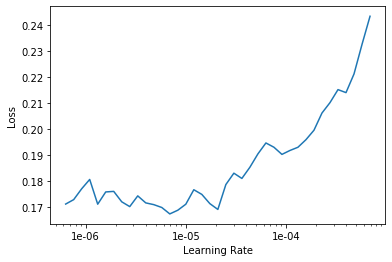

In [38]:
learn.recorder.plot()

In [39]:
learn.unfreeze()
learn.fit_one_cycle(4, max_lr = slice(1e-6, 1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.206567,0.199134,0.061570,01:36
1,0.170553,0.187383,0.053451,01:37
2,0.141099,0.195539,0.054127,01:38
3,0.120996,0.187884,0.054804,01:41


In [0]:
learn.save('stage_3_3')

In [6]:
fnames[:3]  

[PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Birman_8.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/american_pit_bull_terrier_42.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Egyptian_Mau_85.jpg')]

In [0]:
d = fnames[0]

In [0]:
def get_name(path_obj):
  name = path_obj.name
  name = name.split('.')[0]
  return name.rsplit('_', 1)[0]


In [0]:
data = ImageDataBunch.from_name_func(path_img, fnames, label_func = lambda x: (x.name.split('.')[0]).rsplit('_', 1)[0], ds_tfms = get_transforms(), size = 299, bs = 64).normalize(imagenet_stats)

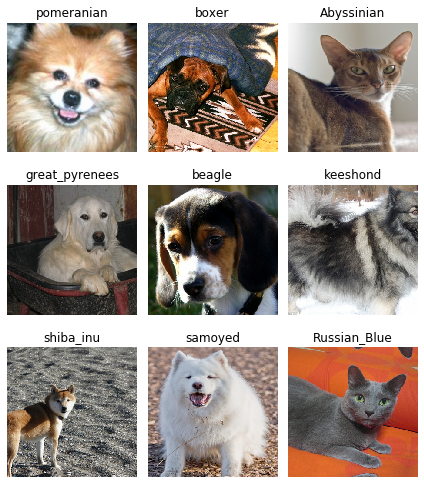

In [35]:
data.show_batch(rows = 3, figsize = (6, 7))

In [37]:
learn_1 = cnn_learner(data, models.resnet34, metrics = accuracy)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [38]:
learn_1.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,time
0,1.361546,0.282061,0.903248,02:09
1,0.584352,0.219925,0.920162,02:10
2,0.340858,0.189646,0.939107,02:09
3,0.237993,0.166743,0.939784,02:11


epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


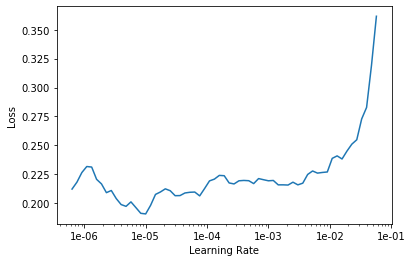

In [39]:
learn_1.lr_find()
learn_1.recorder.plot()
learn_1.save('learn_1_1')
# learn_1.unfreeze()

In [0]:
learn_1.unfreeze()

In [41]:
learn_1.fit_one_cycle(2, max_lr = slice(1e-5, 1e-2))

epoch,train_loss,valid_loss,accuracy,time
0,0.970141,0.796024,0.808525,02:14
1,0.494141,0.248141,0.926928,02:11


In [42]:
learn_1.fit_one_cycle(2, max_lr = slice(1e-5, 1e-2))

epoch,train_loss,valid_loss,accuracy,time
0,0.693464,0.918992,0.789581,02:11
1,0.413489,0.264088,0.922869,02:09


In [0]:
learn_1.load('learn_1_1')

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


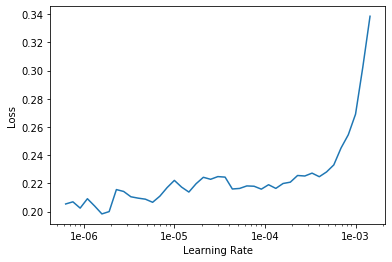

In [45]:
learn_1.lr_find()
learn_1.recorder.plot()

In [46]:
learn_1.fit_one_cycle(2, max_lr = slice(1e-6, 1e-4))

epoch,train_loss,valid_loss,accuracy,time
0,0.224446,0.158024,0.944520,02:15
1,0.194348,0.154251,0.950609,02:10


In [48]:
interp = ClassificationInterpretation.from_learner(learn_1)

In [49]:
interp.most_confused(min_val=2)

[('Ragdoll', 'Birman', 6),
 ('British_Shorthair', 'Russian_Blue', 4),
 ('Egyptian_Mau', 'Bengal', 3),
 ('american_pit_bull_terrier', 'staffordshire_bull_terrier', 3),
 ('boxer', 'american_bulldog', 3),
 ('Abyssinian', 'Bengal', 2),
 ('Bengal', 'Egyptian_Mau', 2),
 ('Birman', 'Siamese', 2),
 ('Bombay', 'Russian_Blue', 2),
 ('Persian', 'Ragdoll', 2),
 ('Ragdoll', 'Persian', 2),
 ('basset_hound', 'beagle', 2),
 ('chihuahua', 'miniature_pinscher', 2)]